# Project Overview
Project goal: Analyze last mile delivery data and predict ETA.
Dataset: 43,632 Amazon deliveries with agent info, location coordinates, and timestamps.
Tools: Python, Pandas, Seaborn, Matplotlib, Scikit-learn
Outcome: Predict ETA with >85% accuracy. Identify key delivery inefficiencies.

# Phase 1 : Data Loading & Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from scipy.stats import stats
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("amazon_delivery.csv")

In [2]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [3]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

# Data Cleaning and EDA

In [6]:
# "Weather" and "Agent_rating" columns have nulls. 
df["Weather"].fillna(df["Weather"].mode()[0],inplace=True)
df.isnull().sum()

df["Agent_Rating"].fillna(df["Agent_Rating"].median(),inplace=True)
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

<Axes: xlabel='Agent_Rating'>

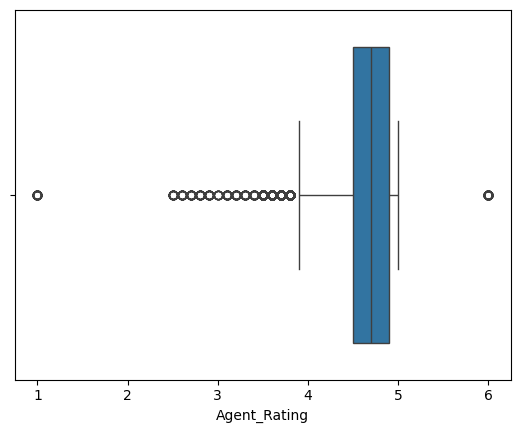

In [7]:
#Null values are handled.
sns.boxplot(x=df["Agent_Rating"])

In [8]:
Q1 = df['Agent_Rating'].quantile(0.25)
Q3 = df['Agent_Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate mean of non-outlier values
mean_rating = df[(df['Agent_Rating'] >= lower_bound) & (df['Agent_Rating'] <= upper_bound)]['Agent_Rating'].mean()

# Replace outlier values with the mean
df['Agent_Rating'] = df['Agent_Rating'].apply(
    lambda x: mean_rating if x < lower_bound or x > upper_bound else x
)



<Axes: xlabel='Agent_Rating'>

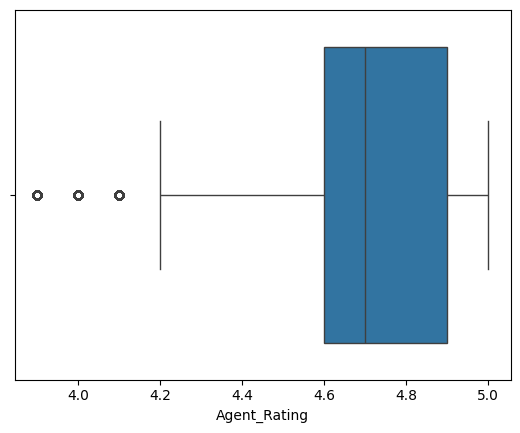

In [9]:
sns.boxplot(x=df["Agent_Rating"])

<Axes: xlabel='Agent_Age'>

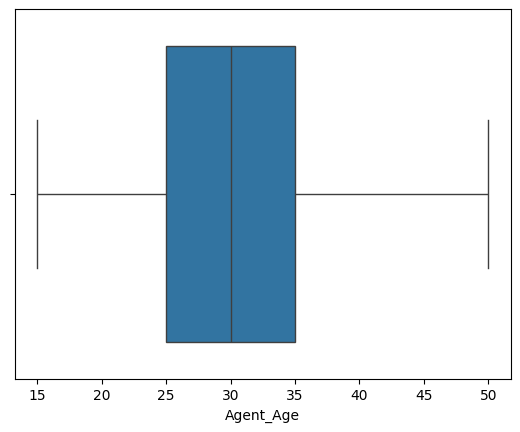

In [10]:
#This looks better now
sns.boxplot(x=df["Agent_Age"])

<Axes: xlabel='Weather', ylabel='count'>

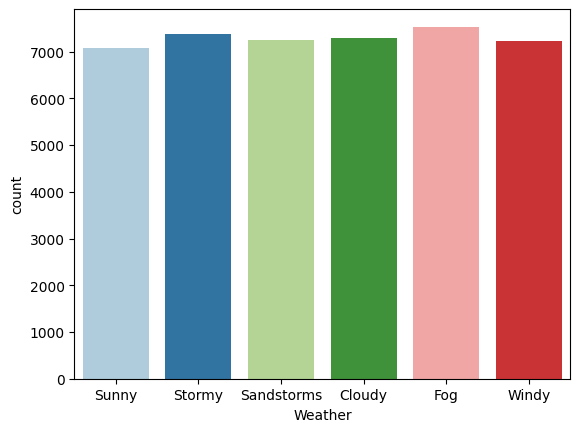

In [18]:
colors = sns.color_palette("Paired", len(df["Weather"].unique()))
sns.countplot(x=df["Weather"], palette=dict(zip(df["Weather"].unique(), colors)))

<Axes: xlabel='Traffic', ylabel='count'>

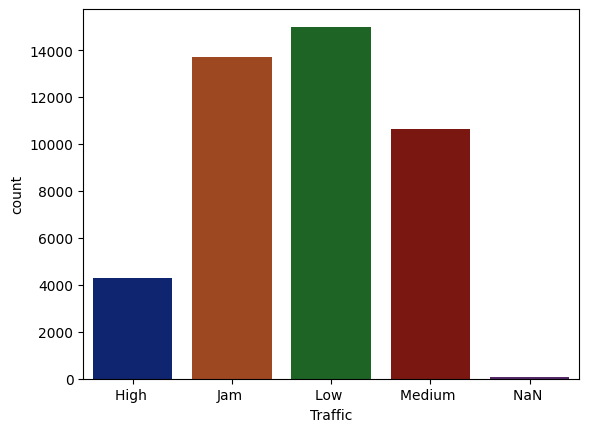

In [12]:
colors = sns.color_palette("dark", len(df["Traffic"].unique()))
sns.countplot(x=df["Traffic"], palette=dict(zip(df["Traffic"].unique(),colors)))

<Axes: xlabel='Traffic', ylabel='count'>

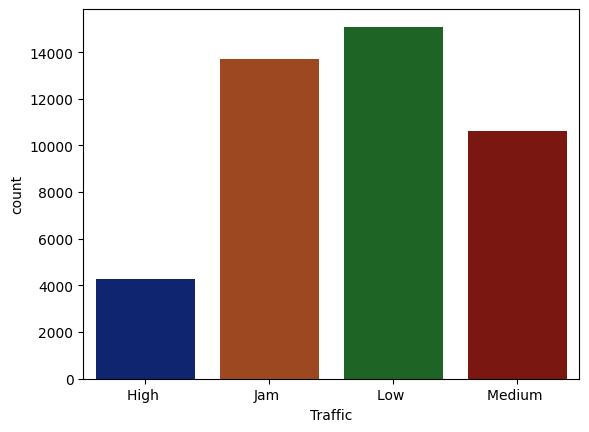

In [13]:
#The "NaN" column needs to be fixed.
df["Traffic"].value_counts()
num = df['Traffic'].mode()[0]
df['Traffic'].replace('NaN ',num,inplace=True)
colors = sns.color_palette("dark", len(df["Traffic"].unique()))
sns.countplot(x=df["Traffic"], palette=dict(zip(df["Traffic"].unique(),colors)))

<Axes: xlabel='Vehicle', ylabel='count'>

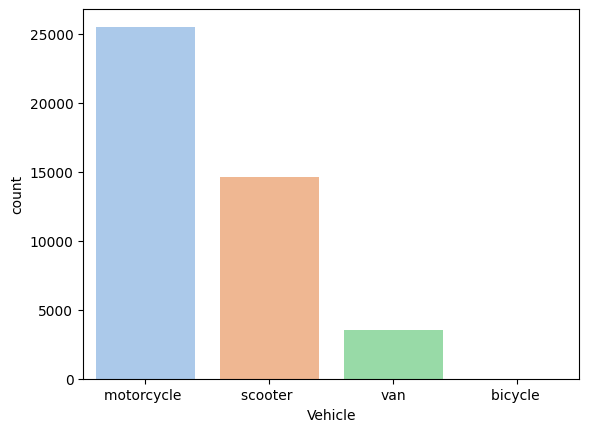

In [16]:
colors = sns.color_palette("pastel", len(df["Vehicle"].unique()))
sns.countplot(x=df["Vehicle"], palette=dict(zip(df["Vehicle"].unique(),colors)))

<Axes: xlabel='Area', ylabel='count'>

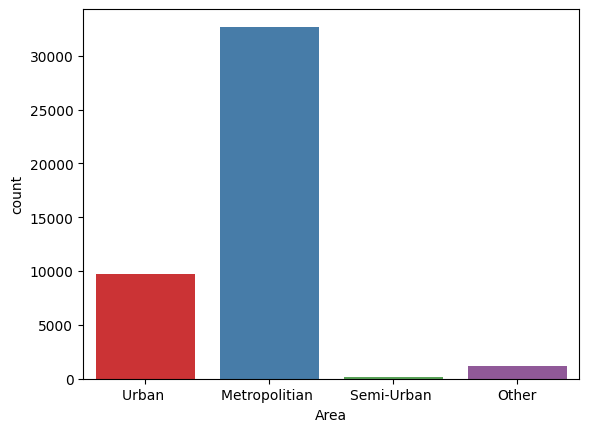

In [20]:
colors = sns.color_palette("Set1", len(df["Area"].unique()))
sns.countplot(x=df["Area"], palette=dict(zip(df["Area"].unique(),colors)))

<Axes: xlabel='count', ylabel='Category'>

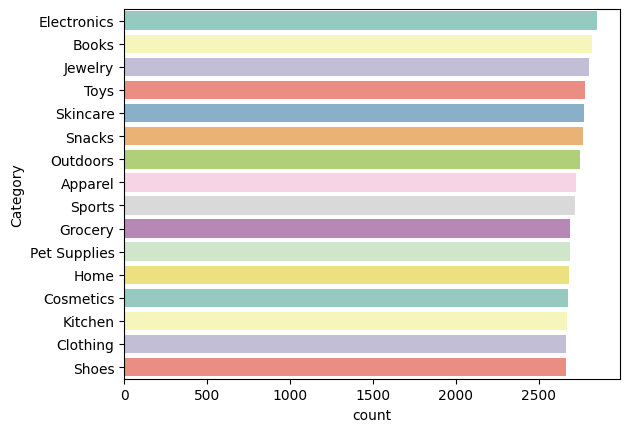

In [27]:
colors = sns.color_palette("Set3", len(df["Category"].unique()))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette=colors)

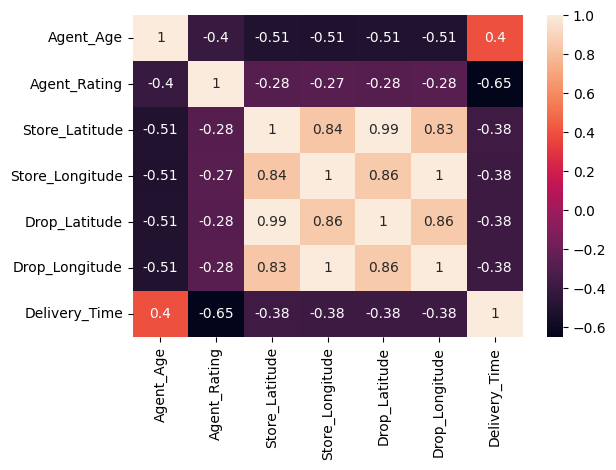

In [28]:
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix.corr(),annot=True)
plt.tight_layout()
plt.show()